https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch
import torchvision
from torchvision import transforms
import torch.nn.functional as F
from torch import nn
import numpy as np

## create transforms and dataset

In [3]:
transforms = transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.5,), (0.5,))]) # normalizes images between -1 and 1 
# image = (image - mean) / std

In [4]:
trainset = torchvision.datasets.FashionMNIST("./datasets/", download=True, transform=transforms)

In [5]:
sample = trainset[0]

In [6]:
sample[0].numpy()[0,:,:].shape

(28, 28)

sample is a now a list with `[tensor dim (1,28,28), label as int]` 

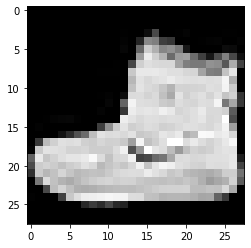

In [7]:
plt.imshow(sample[0].numpy()[0,:,:], cmap='gray')

## create dataloader for dataset

In [8]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=8)

## show data

In [9]:
# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# helper function to show an image
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [10]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

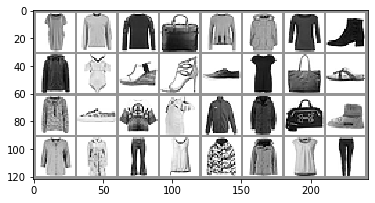

In [11]:
matplotlib_imshow(torchvision.utils.make_grid(images), True)

In [12]:
print(' '.join('%5s' % classes[labels[j]] for j in range(len(labels))))

Dress Pullover Pullover   Bag Pullover  Coat T-shirt/top Ankle Boot  Coat T-shirt/top Sandal Sandal Sneaker T-shirt/top   Bag Sandal Shirt Sneaker Shirt Shirt  Coat  Coat   Bag Ankle Boot Shirt  Coat Trouser T-shirt/top  Coat  Coat T-shirt/top Trouser


## Create architecture

In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [14]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

## move everything to gpu

In [15]:
device = torch.device('cuda')

In [16]:
net.to(device)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

## write training loop

In [18]:
for epoch in range(5):
    running_loss = 0.0
    # get data
    for batch_idx, data in enumerate(trainloader):
        # unpacks the data from the trainingloader
        images, labels = data #data[0].to(device), data[1].to(device)
        images = images.to(device)
        labels = labels.to(device)
        
        # clear gradients
        optimizer.zero_grad()
        # run batch through network
        outputs = net(images)
        # calculate loss
        loss = loss_func(outputs, labels)
        # calculate gradients from loss
        loss.backward()
        # update weights
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if batch_idx % 200 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, batch_idx + 1, running_loss / 2000))
            running_loss = 0.0
    

[1,     1] loss: 0.001
[1,   201] loss: 0.109
[1,   401] loss: 0.068
[1,   601] loss: 0.058
[1,   801] loss: 0.054
[1,  1001] loss: 0.050
[1,  1201] loss: 0.048
[1,  1401] loss: 0.044
[1,  1601] loss: 0.043
[1,  1801] loss: 0.044
[2,     1] loss: 0.000
[2,   201] loss: 0.039
[2,   401] loss: 0.038
[2,   601] loss: 0.037
[2,   801] loss: 0.038
[2,  1001] loss: 0.037
[2,  1201] loss: 0.037
[2,  1401] loss: 0.036
[2,  1601] loss: 0.036
[2,  1801] loss: 0.034
[3,     1] loss: 0.000
[3,   201] loss: 0.034
[3,   401] loss: 0.033
[3,   601] loss: 0.034
[3,   801] loss: 0.032
[3,  1001] loss: 0.030
[3,  1201] loss: 0.031
[3,  1401] loss: 0.031
[3,  1601] loss: 0.031
[3,  1801] loss: 0.030
[4,     1] loss: 0.000
[4,   201] loss: 0.030
[4,   401] loss: 0.030
[4,   601] loss: 0.029
[4,   801] loss: 0.028
[4,  1001] loss: 0.028
[4,  1201] loss: 0.028
[4,  1401] loss: 0.028
[4,  1601] loss: 0.029
[4,  1801] loss: 0.029
[5,     1] loss: 0.000
[5,   201] loss: 0.026
[5,   401] loss: 0.027
[5,   601] 